In [76]:
import os
import glob
import re
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

from umap import UMAP
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans  # Import KMeans from sklearn.cluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import MeanShift
import matplotlib.colors as mcol

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
# list of reference points
pdb_green_filenames = [
    "6cb0_A_CYS_SG_257_A_LYS_NZ_255.pdb", "6cb0_B_CYS_SG_257_B_LYS_NZ_255.pdb", "2ccm_A_CYS_SG_24_A_LYS_NZ_41.pdb",
    "2ccm_B_CYS_SG_24_B_LYS_NZ_41.pdb", "3cze_A_CYS_SG_173_A_LYS_NZ_320.pdb", "3czg_A_CYS_SG_173_A_LYS_NZ_320.pdb",
    "1esi_A_CYS_SG_98_A_LYS_NZ_38.pdb", "6faj_A_CYS_SG_149_A_LYS_NZ_307.pdb", "6faj_B_CYS_SG_149_B_LYS_NZ_307.pdb",
    "6fbp_A_CYS_SG_149_A_LYS_NZ_307.pdb", "6fbp_B_CYS_SG_149_B_LYS_NZ_307.pdb", "3fd5_A_CYS_SG_31_A_LYS_NZ_27.pdb",
    "3fd5_B_CYS_SG_31_B_LYS_NZ_27.pdb", "3fuo_A_CYS_SG_1279_A_LYS_NZ_1235.pdb", "4fvq_A_CYS_SG_747_A_LYS_NZ_650.pdb",
    "4ga9_A_CYS_SG_17_A_LYS_NZ_100.pdb", "4ga9_A_CYS_SG_89_A_LYS_NZ_100.pdb", "4ga9_B_CYS_SG_17_B_LYS_NZ_100.pdb",
    "4ga9_B_CYS_SG_89_B_LYS_NZ_100.pdb", "6i5i_A_CYS_SG_151_A_LYS_NZ_174.pdb", "1i7e_A_CYS_SG_370_A_LYS_NZ_339.pdb",
    "4jhy_A_CYS_SG_37_A_LYS_NZ_32.pdb", "1m3q_A_CYS_SG_253_A_LYS_NZ_249.pdb", "4mtl_B_CYS_SG_160_B_LYS_NZ_76.pdb",
    "3na8_A_CYS_SG_227_A_LYS_NZ_185.pdb", "3na8_B_CYS_SG_227_B_LYS_NZ_185.pdb", "3na8_C_CYS_SG_227_C_LYS_NZ_185.pdb",
    "3na8_D_CYS_SG_227_D_LYS_NZ_185.pdb", "4np9_A_CYS_SG_473_A_LYS_NZ_423.pdb", "2nx9_A_CYS_SG_148_A_LYS_NZ_178.pdb",
    "2nx9_B_CYS_SG_148_B_LYS_NZ_178.pdb", "1o5u_A_CYS_SG_41_A_LYS_NZ_84.pdb", "1o5u_B_CYS_SG_41_B_LYS_NZ_84.pdb",
    "6pck_A_CYS_SG_68_A_LYS_NZ_74.pdb", "3ptr_B_CYS_SG_240_B_LYS_NZ_266.pdb", "3pua_A_CYS_SG_240_A_LYS_NZ_266.pdb",
    "2py5_A_CYS_SG_106_A_LYS_NZ_114.pdb", "3qwl_A_CYS_SG_286_A_LYS_NZ_233.pdb", "6sdp_A_CYS_SG_154_A_LYS_NZ_158.pdb",
    "6t3x_A_CYS_SG_54_A_LYS_NZ_132.pdb", "6t3x_C_CYS_SG_54_C_LYS_NZ_132.pdb", "3u7z_A_CYS_SG_100_A_LYS_NZ_128.pdb",
    "3u7z_B_CYS_SG_100_B_LYS_NZ_128.pdb", "6ulh_A_CYS_SG_314_A_LYS_NZ_320.pdb", "1uxb_A_CYS_SG_333_A_LYS_NZ_295.pdb",
    "1uxb_B_CYS_SG_333_B_LYS_NZ_295.pdb", "1uxb_C_CYS_SG_333_C_LYS_NZ_295.pdb", "6uxe_D_CYS_SG_95_D_LYS_NZ_135.pdb",
    "3vcr_A_CYS_SG_162_A_LYS_NZ_136.pdb", "3vcr_B_CYS_SG_162_B_LYS_NZ_136.pdb", "6w1d_D_CYS_SG_95_D_LYS_NZ_135.pdb",
    "6wi2_A_CYS_SG_381_D_LYS_NZ_135.pdb", "6wi2_D_CYS_SG_95_D_LYS_NZ_135.pdb", "6wih_A_CYS_SG_381_D_LYS_NZ_135.pdb",
    "6wih_D_CYS_SG_95_D_LYS_NZ_135.pdb", "2wpg_A_CYS_SG_174_A_LYS_NZ_321.pdb", "3wva_A_CYS_SG_9_A_LYS_NZ_79.pdb",
    "3wva_B_CYS_SG_9_B_LYS_NZ_79.pdb", "3wvb_A_CYS_SG_9_A_LYS_NZ_79.pdb", "3wvb_B_CYS_SG_9_B_LYS_NZ_79.pdb",
    "2xhi_A_CYS_SG_249_A_LYS_NZ_253.pdb", "6xmk_B_CYS_SG_22_B_LYS_NZ_61.pdb", "6y2f_A_CYS_SG_22_A_LYS_NZ_61.pdb",
    "5y72_B_CYS_SG_223_B_LYS_NZ_275.pdb", "2y8k_A_CYS_SG_95_A_LYS_NZ_106.pdb", "5yzp_A_CYS_SG_390_A_LYS_NZ_267.pdb",
    "6zln_A_CYS_SG_151_A_LYS_NZ_174.pdb", "4ndb_B_CYS_SG_24_B_LYS_NZ_41.pdb", "1skf_A_CYS_SG_98_A_LYS_NZ_38.pdb",
    "3rq4_A_CYS_SG_111_A_LYS_NZ_122.pdb", "6f1w_B_CYS_SG_71_B_LYS_NZ_57.pdb", "3e46_A_CYS_SG_92_A_LYS_NZ_97.pdb",
    "5y72_A_CYS_SG_223_A_LYS_NZ_275.pdb", "6uxe_A_CYS_SG_158_A_HIS_ND1_156.pdb", "1es5_A_CYS_SG_98_A_LYS_NZ_38.pdb",
    "6eut_A_CYS_SG_205_A_LYS_NZ_163.pdb", "6f1w_A_CYS_SG_71_A_LYS_NZ_57.pdb", "4ndb_A_CYS_SG_24_A_LYS_NZ_41.pdb",
    "1es2_A_CYS_SG_98_A_LYS_NZ_38.pdb", "4mtl_A_CYS_SG_160_A_LYS_NZ_76.pdb"]


In [78]:
def get_feature(dataf, feature):
    """"
    Get the values of a feature from a dataframe
    :param dataf: dataframe
    :param feature: string
    :return: values of the feature
    """
    vals = dataf[feature]
    return vals

In [79]:
path_data = "../Data/ARG_NE_CYS"
path_cys_arg_umap_f2 = os.path.join(path_data,"UMAP/ARG-all_NE.txt")
path_cys_arg_umap_f2_csv = os.path.join(path_data,"UMAP/ARG-all_NE.csv")

path_cys_arg_pairp_f2_clt0 = os.path.join(path_data,"Pair-Plot/output_cluster_1.txt")
path_cys_arg_pairp_f2_clt1 = os.path.join(path_data,"Pair-Plot/output_cluster_2.txt")

In [80]:
df_umap_f2 = pd.read_csv(path_cys_arg_umap_f2, sep="\t", header=None, skiprows=1, comment='#')

df_umap_f2.columns = ["Chain_S", "Res_S", "S_id",	"Res_S_num", "bfac_S", "bfac_S_BDB", "occ_S", "SASA_S",
                   "SASA_atom_S","Chain_N", "Res_N", "N_id", "Res_N_num", "bfac_N", "bfac_N_BDB" ,"occ_N", 
                   "SASA_N", "SASA_atom_N", "CN_id", "bfac_CN", "occu_CN", "Res_CS", "CS_id", 
                   "bfac_CS", "occu_CS", "distance_SN", "distanceCN", "distanceCS", "angle_CSN", "angle_CNS", 
                   "torsion_CS_NC",'ngb_Res_toN', 'ngb_Res_toS'
                      , "Close_contact", "greenBlob", "filename"]
mask_green_pdb_umapf2 = df_umap_f2["filename"].isin(pdb_green_filenames)

df_pp_f2_clt0 = pd.read_csv(path_cys_arg_pairp_f2_clt0, sep="\t", header=None, skiprows=1, comment='#')
df_pp_f2_clt0.columns = ["Chain_S", "Res_S", "S_id",	"Res_S_num", "bfac_S", "bfac_S_BDB", "occ_S", "SASA_S",
                   "SASA_atom_S","Chain_N", "Res_N", "N_id", "Res_N_num", "bfac_N", "bfac_N_BDB" ,"occ_N", 
                   "SASA_N", "SASA_atom_N", "CN_id", "bfac_CN", "occu_CN", "Res_CS", "CS_id", 
                   "bfac_CS", "occu_CS", "distance_SN", "distanceCN", "distanceCS", "angle_CSN", "angle_CNS", 
                   "torsion_CS_NC", 'ngb_Res_toN', 'ngb_Res_toS',
                         "Close_contact", "greenBlob",
                         "ngb_Res_toS_hashed", "ngb_Res_toS_set",	"ngb_Res_toS_normalized",
                         "ngb_Res_toN_hashed", "ngb_Res_toN_set",	"ngb_Res_toN_normalized",
                         "filename"]
mask_green_pdb_ppf2_clt0 = df_pp_f2_clt0["filename"].isin(pdb_green_filenames)

df_pp_f2_clt1 = pd.read_csv(path_cys_arg_pairp_f2_clt1, sep="\t", header=None, skiprows=1, comment='#')
df_pp_f2_clt1.columns = ["Chain_S", "Res_S", "S_id",	"Res_S_num", "bfac_S", "bfac_S_BDB", "occ_S", "SASA_S",
                   "SASA_atom_S","Chain_N", "Res_N", "N_id", "Res_N_num", "bfac_N", "bfac_N_BDB" ,"occ_N", 
                   "SASA_N", "SASA_atom_N", "CN_id", "bfac_CN", "occu_CN", "Res_CS", "CS_id", 
                   "bfac_CS", "occu_CS", "distance_SN", "distanceCN", "distanceCS", "angle_CSN", "angle_CNS", 
                   "torsion_CS_NC", 'ngb_Res_toN', 'ngb_Res_toS',
                         "Close_contact", "greenBlob",
                         "ngb_Res_toS_hashed", "ngb_Res_toS_set",	"ngb_Res_toS_normalized",
                         "ngb_Res_toN_hashed", "ngb_Res_toN_set",	"ngb_Res_toN_normalized",
                         "filename"]
mask_green_pdb_ppf2_clt1 = df_pp_f2_clt1["filename"].isin(pdb_green_filenames)

Suggested descriptors: bfac_S_BDB, SASA_S, SASA_atom_N, angle_CSN, angle_CNS

In [81]:
def feature_collector(dataini):
    """
    Collect features from a dataframe
    :param dataini: dataframe
    :param output: boolean   
    :return: all features 
    """
    dataset = dataini.drop(columns=['Chain_S', 'Res_S', 'S_id', 'CS_id', 'Chain_N', "Res_CS",
                                'Res_N', 'N_id', 'CN_id', 'Res_S_num', 'Res_N_num',
                                    "occ_S", "occ_N",
                                    "Close_contact"])

    sasa_s = get_feature(dataset, "SASA_S").astype(float)
    sasa_atom_s = get_feature(dataset, "SASA_atom_S").astype(float)
    sasa_n = get_feature(dataset, "SASA_N").astype(float)
    sasa_atom_n = get_feature(dataset, "SASA_atom_N").astype(float)
    
    
    bfac_s = get_feature(dataset, "bfac_S").astype(float)
    bfac_s_bdb = get_feature(dataset, "bfac_S_BDB").astype(float)
    bfac_n = get_feature(dataset, "bfac_N").astype(float)
    bfac_n_bdb = get_feature(dataset, "bfac_N_BDB").astype(float)
    bfac_cn = get_feature(dataset, "bfac_CN").astype(float)
    bfac_cs = get_feature(dataset, "bfac_CS").astype(float)
    
    dist_sn = get_feature(dataset, "distance_SN").astype(float)
    dist_cn = get_feature(dataset, "distanceCN").astype(float)
    dist_cs = get_feature(dataset, "distanceCS").astype(float)
    
    angle_csn = get_feature(dataset, "angle_CSN").astype(float)
    angle_cns = get_feature(dataset, "angle_CNS").astype(float)
    tors_cs_nc = get_feature(dataset, "torsion_CS_NC").astype(float)

    nres_s = 0*angle_csn
    nres_n = 0*angle_csn
    
    return sasa_s, sasa_atom_s, sasa_n, sasa_atom_n, bfac_s, bfac_s_bdb, bfac_n, bfac_n_bdb, bfac_cn, bfac_cs, dist_sn, dist_cn, dist_cs, angle_csn, angle_cns, tors_cs_nc, nres_s, nres_n



In [82]:
def df_creator(dataini):
    """
    Create a dataframe from the data
    :param dataini: data to be used to create the dataframe
    :param output_ngb_norm2: boolean to determine if the output should include the normalized ngb_Res_toS and ngb_Res_toN
    """
    sasa_s, sasa_atom_s, sasa_n, sasa_atom_n, bfac_s, bfac_s_bdb, bfac_n, bfac_n_bdb, bfac_cn, bfac_cs, dist_sn, dist_cn, dist_cs, angle_csn, angle_cns, tors_cs_nc, nres_s, nres_n= feature_collector(dataini) 
    dataset = dataini.drop(columns=['Chain_S', 'Res_S', 'S_id', 'CS_id', 'Chain_N', "Res_CS",
                                'Res_N', 'N_id', 'CN_id','greenBlob'])
    visu_df = pd.DataFrame(
        {
        'bfac_S_BDB': bfac_s_bdb,
        'SASA_atom_N':   sasa_atom_n,
        'SASA_S':   sasa_s,
        'angle_CSN': angle_csn, 
        'angle_CNS': angle_cns,
        })

    visu_df['filename'] = dataset['filename']
    visu_df['index'] = np.arange(visu_df.shape[0])

    print(visu_df.dtypes)

    return visu_df


dataset_umap_f2 = df_creator(df_umap_f2)
mask_pdb_green_umapf2 = dataset_umap_f2["filename"].isin(pdb_green_filenames)

dataset_pp_f2_clt0 = df_creator(df_pp_f2_clt0)
mask_pdb_green_pp_f2_clt0 = dataset_pp_f2_clt0["filename"].isin(pdb_green_filenames)

dataset_pp_f2_clt1 = df_creator(df_pp_f2_clt1)
mask_pdb_green_pp_f2_clt1 = dataset_pp_f2_clt1["filename"].isin(pdb_green_filenames)

dataset_pp_f2_clt0['dataset'] = "Prob. NOS"
dataset_pp_f2_clt1['dataset'] = "Improb. NOS"
combined_data_pp = pd.concat([dataset_pp_f2_clt0,  dataset_pp_f2_clt1]) 


bfac_S_BDB     float64
SASA_atom_N    float64
SASA_S         float64
angle_CSN      float64
angle_CNS      float64
filename        object
index            int64
dtype: object
bfac_S_BDB     float64
SASA_atom_N    float64
SASA_S         float64
angle_CSN      float64
angle_CNS      float64
filename        object
index            int64
dtype: object
bfac_S_BDB     float64
SASA_atom_N    float64
SASA_S         float64
angle_CSN      float64
angle_CNS      float64
filename        object
index            int64
dtype: object


### UMAP

In [83]:
min_dist = 0.0  # Adjust as needed
n_neighbors = 12  # Adjust as needed

umap_model = UMAP(n_components=3, random_state=42, min_dist=min_dist, n_neighbors=n_neighbors)
umap_result_f2 = umap_model.fit_transform(dataset_umap_f2.drop(columns=['filename', 'index']))

# Perform Mean Shift Clustering on the UMAP-transformed data
np.random.seed(42)
mean_shift = MeanShift()
clstr_lbl_f2 = mean_shift.fit_predict(umap_result_f2)
print(np.unique(clstr_lbl_f2))

#Silhouette Score
silhouette_avg = silhouette_score(umap_result_f2, clstr_lbl_f2)
print("-1<Silhouette Score<1:", silhouette_avg)

/Users/shararehsayyad/anaconda3/envs/pinn/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[0 1]
-1<Silhouette Score<1: 0.5607759


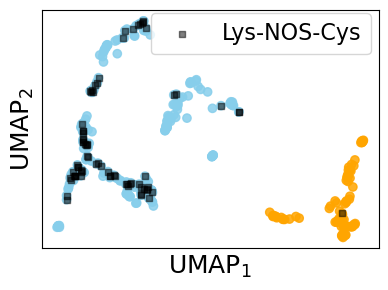

In [84]:
fig, ax = plt.subplots(1, sharex=True, figsize=(4,3))
cmap = mcol.ListedColormap(["skyblue", "orange"]) 

ax.scatter(
    umap_result_f2[:, 0],
    umap_result_f2[:, 1],
    c=clstr_lbl_f2, alpha=0.85, cmap=cmap
)
umap_pdb_green = umap_result_f2[mask_pdb_green_umapf2]
ax.scatter(
    umap_pdb_green[:, 0],
    umap_pdb_green[:, 1],
    c="black", alpha=0.5, marker="s",
    s=20.5,
    label="Lys-NOS-Cys"
)


ax.tick_params(
    axis='x', which='both',bottom=False,   
    top=False, labelbottom=False) 
ax.tick_params(
    axis='y', which='both', left=False,      
    right=False, labelleft=False) 
# ax.xaxis.set_label_position('top')
ax.set_xlabel(r"UMAP$_{1}$", fontsize=18)
ax.set_ylabel(r"UMAP$_{2}$", fontsize=18)
ax.legend(loc = 'center', bbox_to_anchor=(0.65,0.9), fontsize=16)

fig.tight_layout()   
fig.savefig("../Figs/ARG_NE_CYS/Figs_umap_arg_ne_cys.png", bbox_inches='tight',pad_inches = 0, dpi = 300)

In [85]:
# Write all clusters and count the common filenames with reference points for each cluster to a single file
with open("Data_List_filenames_in_clusters/ARG_NE_CYS/filenames_cluster_elements.txt", "w") as file:

    cluster_counts = {}
    for cluster in set(clstr_lbl_f2):
        cluster_indices = [i for i, label in enumerate(clstr_lbl_f2) if label == cluster]
        cluster_file_names =  combined_data_pp.loc[clstr_lbl_f2 == cluster, 'filename']  
        cluster_file_names_processed = list(cluster_file_names) 
        file.write(f"\n")
        file.write('\n'.join([f"Cluster {cluster+1}: {filename}" for filename in cluster_file_names_processed]) + '\n\n')
        file.write("\n")

        cluster_counts[cluster + 1] = len(cluster_file_names)

    # Print counts
    for cluster, count in cluster_counts.items():
        print(f"Size of cluster {cluster}= {count}")

Size of cluster 1= 243
Size of cluster 2= 75


Uncomment the follwing cell only when you want to generate the files to be plotted for the pairplots. The data files for each clusters will be generated and saved in "Figure_scripts/Data_List_filenames_in_clusters".

We currently comment it out and use the already collected data in the "Data" directory.

In [86]:
# with open("Data_List_filenames_in_clusters/ARG_NE_CYS/filenames_cluster_elements.txt", "r") as block_file:
#     block_lines = block_file.readlines()

# with open(path_cys_arg_umap_f2_csv, "r") as cys_file:
#     cys_header = cys_file.readline().strip()
#     cys_lines = cys_file.readlines()


# # Initialize cluster_mapping dictionary
# cluster_mapping = {}

# # Extract filenames and cluster numbers from Block.txt
# for line in block_lines:
#     if line.startswith("Cluster"):
#         cluster_number = line.split()[1][:-1]
#     if line.strip() != "":
#         filename = line.split(": ")[1].strip()
#         # print(filename)
#         cluster_mapping[filename] = cluster_number


# # Filter lines based on existence in Block.txt and write them to the output files
# for cluster_number in ["1", "2"]:
#     output_filename = f"Data_List_filenames_in_clusters/ARG_NE_CYS/output_cluster_{cluster_number}.txt"
#     with open(output_filename, "w") as output_file:
#         # Write the header
#         output_file.write(cys_header + "\n")
#         for line in cys_lines:
#             filename = line.strip().split()[-1]
#             if filename in cluster_mapping and cluster_mapping[filename] == cluster_number:
#                 output_file.write(line)


### PairPlot

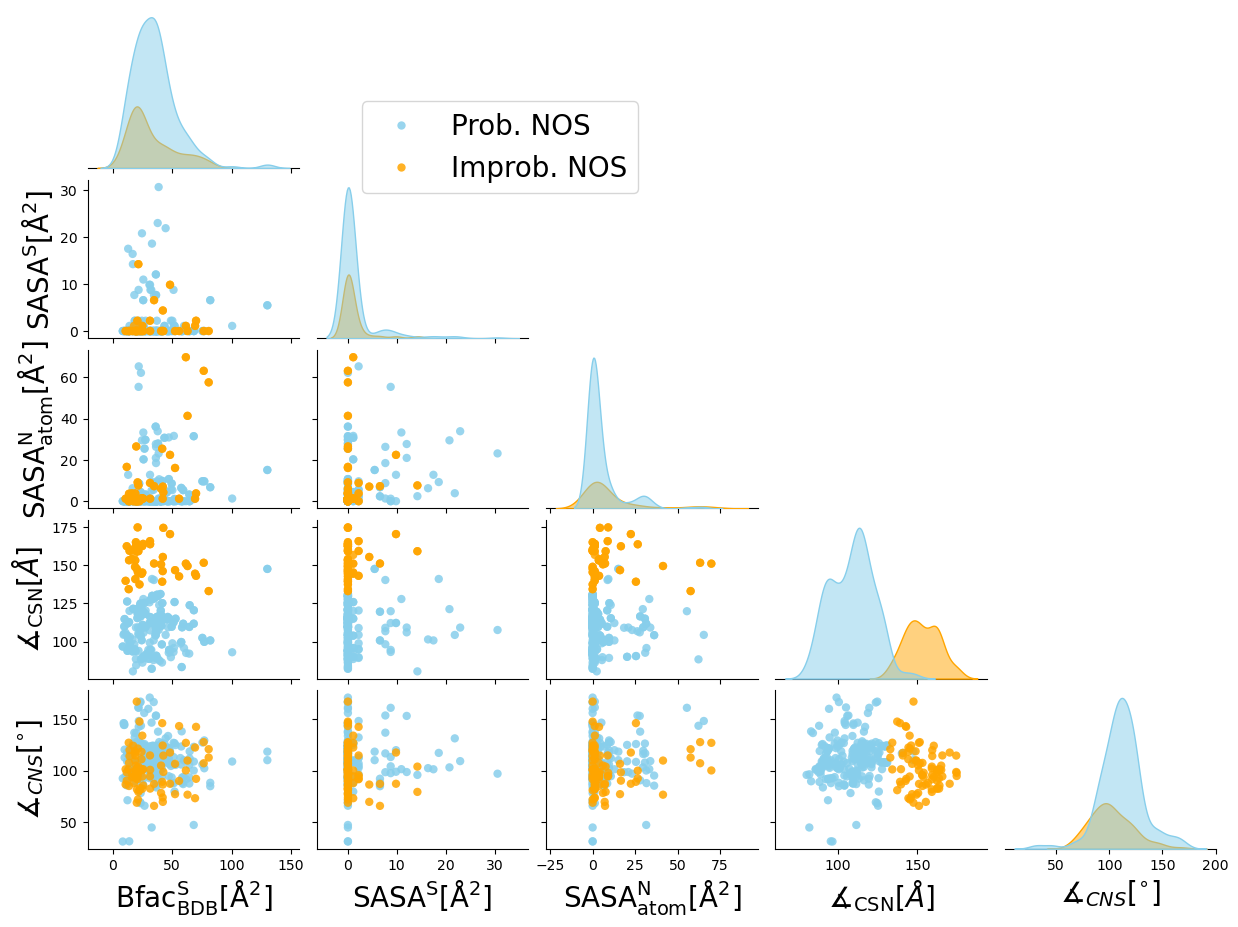

In [87]:
custom_palette = {'Prob. NOS': 'skyblue', 'Prob. NOS 2': 'royalblue', 'Improb. NOS': 'orange'}
labels=[r"$\rm Bfac^{\rm S}_{\rm BDB}[\AA^{2}]$", r"$\rm SASA^{\rm S}[\AA^{2}]$", r"$\rm SASA^{\rm N}_{\rm atom}[\AA^{2}]$", r"$\measuredangle_{\rm CSN}[\AA]$", r"$\measuredangle_{CNS}[^{\circ}]$" ]

with sns.plotting_context(rc={"axes.labelsize":20}):
    pp = sns.pairplot(combined_data_pp.drop(columns=['index', 'filename']), hue='dataset', diag_kind='kde',
                      plot_kws=dict(alpha=0.85, edgecolor='none'),
                      diag_kws=dict(alpha=0.5),
                      palette=custom_palette, corner=True)

pp.x_vars = labels
pp.y_vars = labels
pp._add_axis_labels()

pp._legend.remove()
handles = pp._legend_data.values()
labels = pp._legend_data.keys()
pp.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(.365, 0.9), ncol=1, fontsize=20)

pp.fig.set_size_inches(14,9.4)
pp.tight_layout()

pp.savefig("../Figs/ARG_NE_CYS/Figs_pairplot_arg_ne_cys.png", bbox_inches='tight',pad_inches = 0, dpi = 300)


/var/folders/yz/2837m_ld3zdd1m1rrbd83jfm0000gn/T/ipykernel_58078/3102077221.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


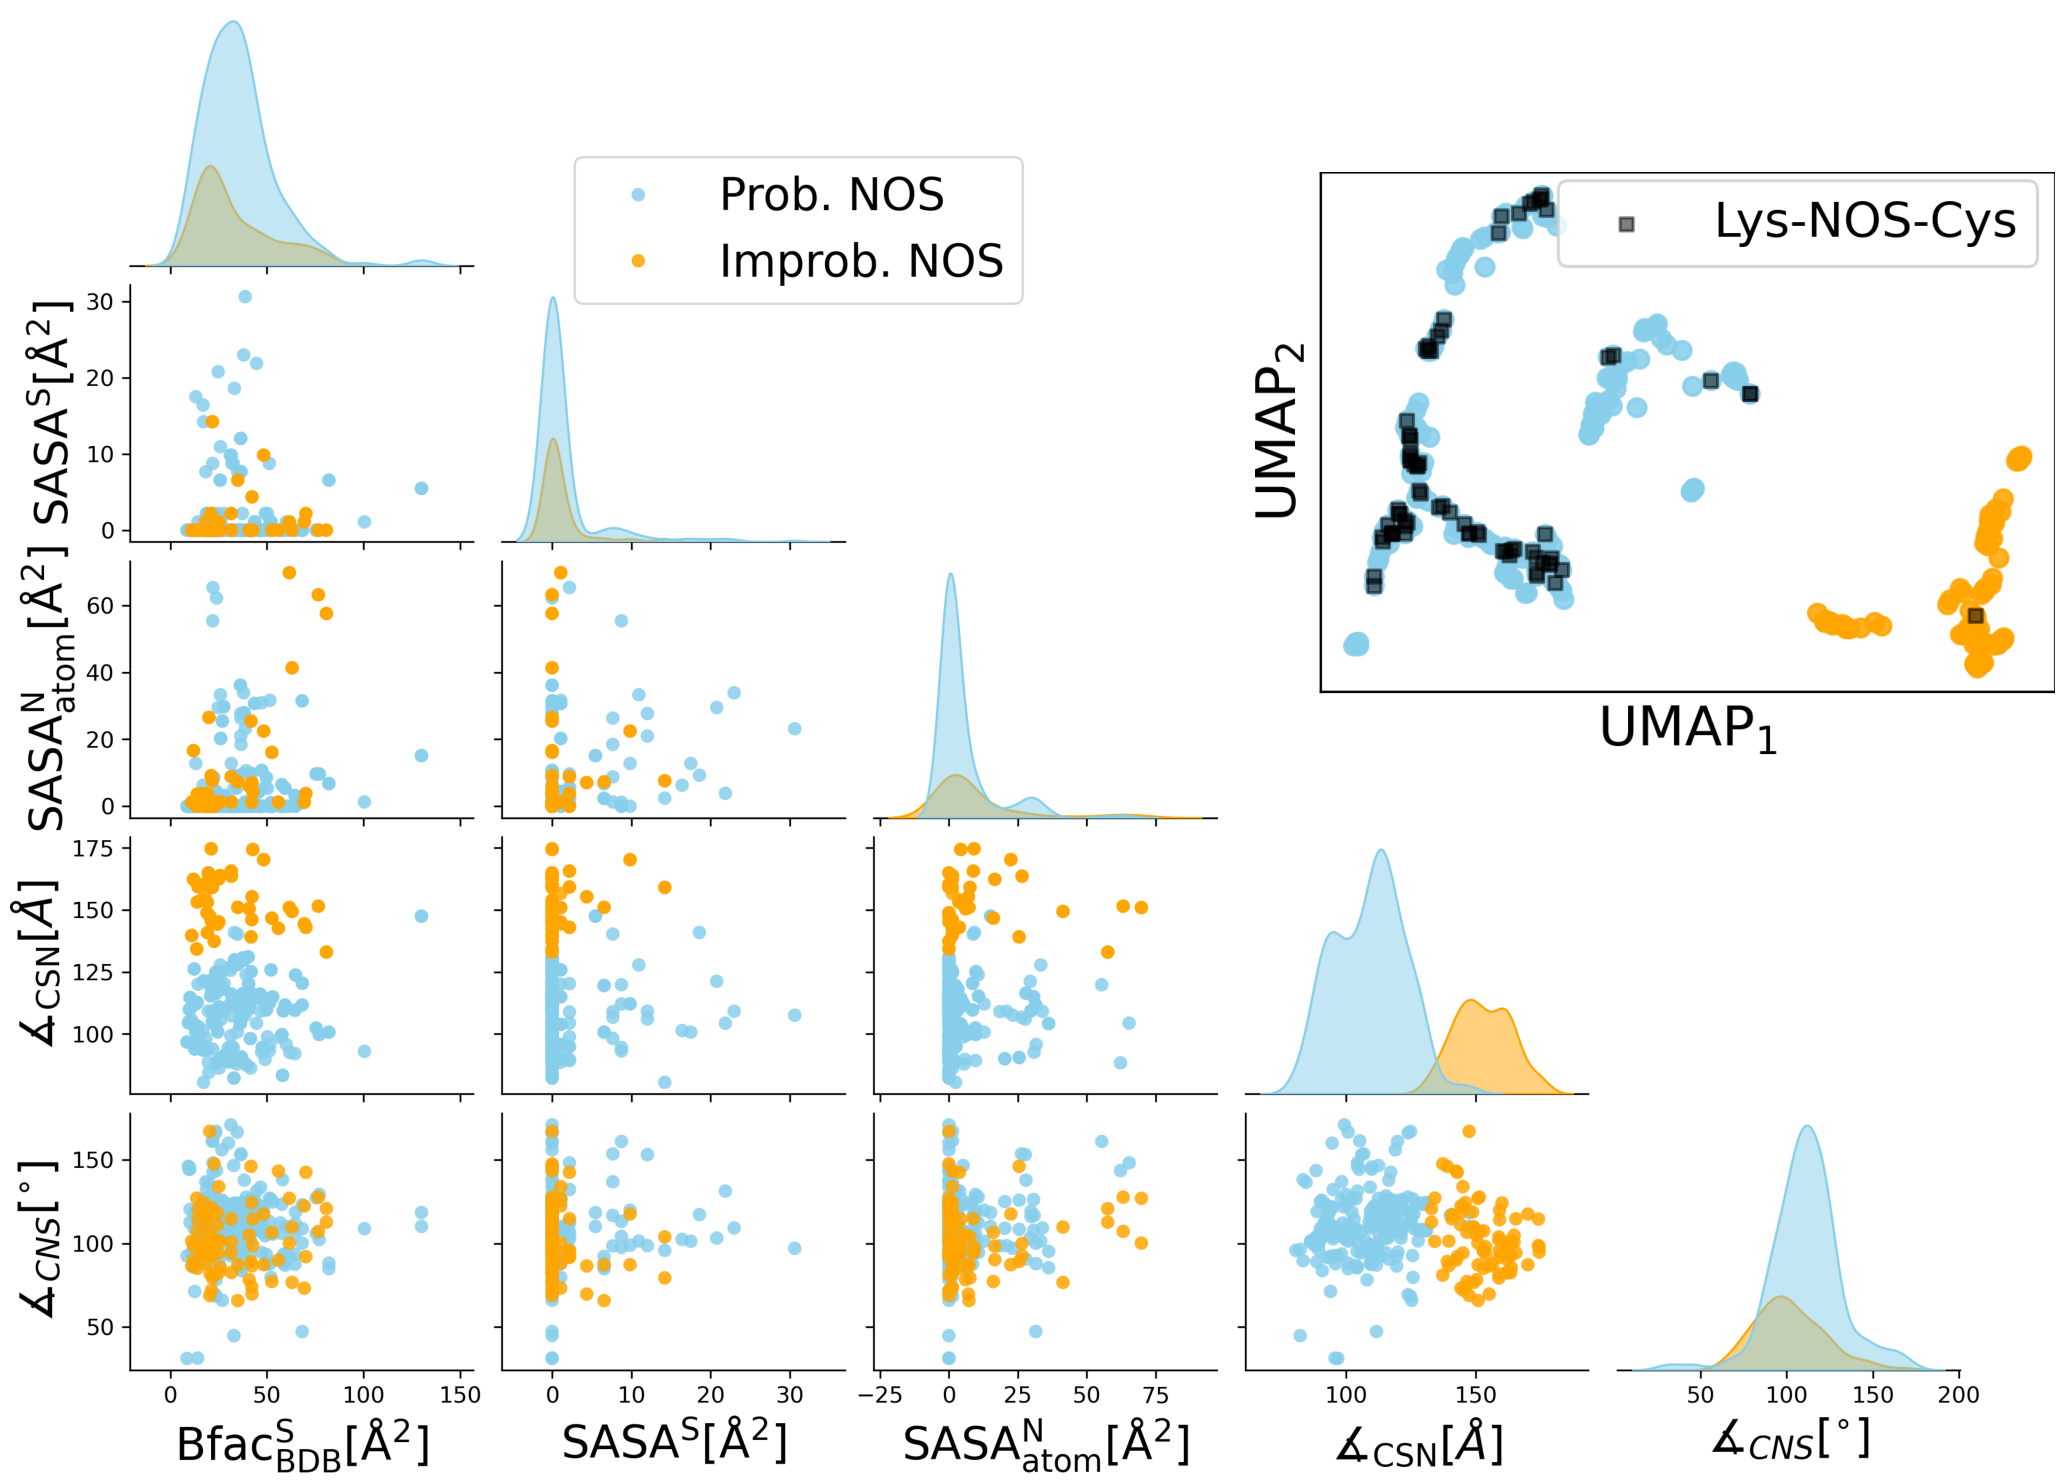

In [88]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(figsize=(20,15))
axs.imshow(mpimg.imread('../Figs/ARG_NE_CYS/Figs_pairplot_arg_ne_cys.png'))
axs.axis('off')


newax = fig.add_axes([0.63, 0.48, 0.4, 0.4], anchor='NE')
newax.imshow(mpimg.imread('../Figs/ARG_NE_CYS/Figs_umap_arg_ne_cys.png'))
newax.axis('off')


plt.tight_layout()   
plt.savefig("../Figs/ARG_NE_CYS/Figs_umap_pairplot_arg_ne_cys.png", bbox_inches='tight',pad_inches = 0, dpi = 300)


